<a href="https://colab.research.google.com/github/LeDangXuanBach/Machine-learning/blob/main/Lab_4_20130199_LeDangXuanBach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to continous dealing with **Logistic Regression**, **kNN**, and **Decision Tree** alogirthms applied to classification tasks. 

*   **Deadline: 23:59, 12/03/2023**



# ***Kết nối cơ sở dữ liệu***

In [12]:
#code
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML/Data_lab4'


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ML/Data_lab4


# Import libraries

In [4]:
# code
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

from sklearn.preprocessing import StandardScaler




#Task 1. 
Apply **LogisticRegression** to iris dataset which aims at classifying species of iris based on sepal_length (chiều dài đài hoa), sepal_width, petal_length (chiều dài cánh hoa), petal_width. The species are '**setosa**' '**versicolor**' and '**virginica**'. 



```
from sklearn import datasets
data4 = datasets.load_iris()
```




[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]
Độ chính xác :  0.9777777777777777


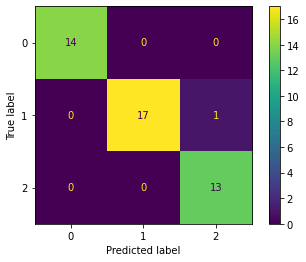

In [5]:
# code
data4 = datasets.load_iris()
X = data4.data
y = data4.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 1)

lr1 = LogisticRegression(random_state = 41) 
lr1.fit(X_train, y_train)

y_pred = lr1.predict(X_test)
print(y_pred)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print("Độ chính xác : ", accuracy_score(y_test, y_pred)) 


#Task 2. 
Apply LogisticRegression to **MNIST** dataset (mnist.csv) which aims at classifying handwritten digits. Dataset includes 784 pixels values of images (28x28). 


```
from sklearn import datasets
# load the MNIST digits dataset
mnist = datasets.load_digits()
```



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Độ chính xác :  0.9648148148148148


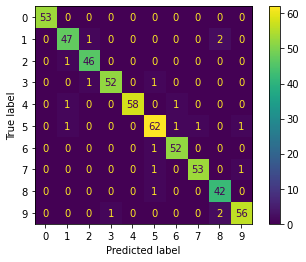

In [6]:
# code
# load the MNIST digits dataset
mnist = datasets.load_digits()
X = mnist.data
y = mnist.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

lr1 = LogisticRegression(random_state= 42) 
lr1.fit(X_train, y_train)

y_pred = lr1.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print("Độ chính xác : ", accuracy_score(y_test, y_pred))  

#Task 3. 
Apply another classification algorithm named kNN, which is an instance classifcation model. 
*  3.1. Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.

*   3.2. Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).



3.1

Best k: 3
Best accuracy: 1.0

3.2

Logistic regression performance

Accuracy: 0.9777777777777777
Precision: 0.9761904761904763
Recall: 0.9803921568627452
F1 score: 0.9775533108866442


Knn performance



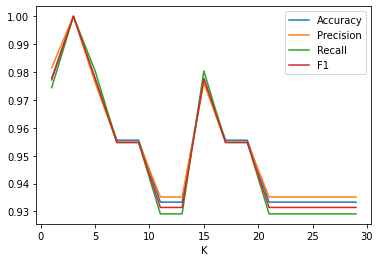

In [12]:
# code
data3 = datasets.load_iris()
X_train3, X_test3, y_train3, y_test3 = train_test_split(data3.data, data3.target, test_size=0.3, random_state=43)

# 3.1
best_k = None
best_accuracy = 0
k_arr = list(range(1, 30, 2))
# KNN performance
accuracy_knn = []
precision_knn = []
recall_knn = []
f1_knn = []
for k in k_arr:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train3, y_train3)
  y_pred3 = knn.predict(X_test3)
  accuracy = accuracy_score(y_test3, y_pred3)
  accuracy_knn.append(accuracy)
  precision_knn.append(precision_score(y_test3, y_pred3, average="macro"))
  recall_knn.append(recall_score(y_test3, y_pred3, average="macro"))
  f1_knn.append(f1_score(y_test3, y_pred3, average="macro"))
  if accuracy > best_accuracy:
    best_k = k
    best_accuracy = accuracy

print("\n3.1\n")
print("Best k:", best_k)
print("Best accuracy:", best_accuracy)

#3.2
lr3 = LogisticRegression()
lr3.fit(X_train3, y_train3)
# Logistic regerssion performance
y_pred_lr3 = lr3.predict(X_test3)
accuracy_lr3 = accuracy_score(y_test3, y_pred_lr3)
precision_lr3 = precision_score(y_test3, y_pred_lr3, average="macro")
recall_lr3 = recall_score(y_test3, y_pred_lr3, average="macro")
f1_lr3 = f1_score(y_test3, y_pred_lr3, average="macro")


print("\n3.2\n")
print("Logistic regression performance\n")
print("Accuracy:", accuracy_lr3)
print("Precision:", precision_lr3)
print("Recall:", recall_lr3)
print("F1 score:", f1_lr3)

print("\n\nKnn performance\n")
plt.plot(k_arr, accuracy_knn, label = "Accuracy")
plt.plot(k_arr, precision_knn, label = "Precision")
plt.plot(k_arr, recall_knn, label = "Recall")
plt.plot(k_arr, f1_knn, label = "F1")
plt.xlabel("K")
plt.legend()





#Task 4. 
Similar to Task 3, apply kNN algorithm to **mnist** dataset which included in datasets of sklearn API.
*  4.1.	Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.
*  4.2.	Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).



4.1

Best K: 9
Best accuracy: 0.9962962962962963

4.2

Logistic regression performance - knn performance:
Accuracy: 0.9722222222222222
Precision: 0.9717894885320533
Recall: 0.9732995678126766
F1 score: 0.10549996126682344


Knn performance



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


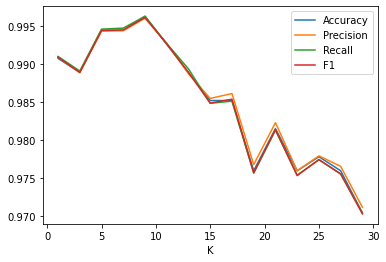

In [10]:
# code
mnist = datasets.load_digits()
X_train4, X_test4, y_train4, y_test4 = train_test_split(mnist.data, mnist.target, test_size = 0.3, random_state = 44)

best_k = None
best_accuracy = 0
k_arr = list(range(1, 30, 2))
# KNN performance
accuracy_knn4 = []
precision_knn4 = []
recall_knn4 = []
f1_knn4 = []
for k in k_arr:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train4, y_train4)
  y_pred4 = knn.predict(X_test4)
  accuracy = accuracy_score(y_test4, y_pred4)
  accuracy_knn4.append(accuracy)
  precision_knn4.append(precision_score(y_test4, y_pred4, average="macro"))
  recall_knn4.append(recall_score(y_test4, y_pred4, average="macro"))
  f1_knn4.append(f1_score(y_test4, y_pred4, average="macro"))
  if accuracy > best_accuracy:
    best_k = k
    best_accuracy = accuracy

print("\n4.1\n")
print("Best K:", best_k)
print("Best accuracy:", best_accuracy)

# 4.2
lr4 = LogisticRegression()
lr4.fit(X_train4, y_train4)
#Logistic regression performance
y_pred_lr4 = lr4.predict(X_test4)
accuracy_lr4 = accuracy_score(y_test4, y_pred_lr4)
precision_lr4 = precision_score(y_test4, y_pred_lr4, average="macro")
recall_lr4 = recall_score(y_test4, y_pred_lr4, average="macro")
f1_lr4 = f1_score(y_test, y_pred_lr4, average="macro")

print("\n4.2\n")
print("Logistic regression performance - knn performance:")
print("Accuracy:", accuracy_lr4)
print("Precision:", precision_lr4)
print("Recall:", recall_lr4)
print("F1 score:", f1_lr4)


print("\n\nKnn performance\n")
plt.plot(k_arr, accuracy_knn4, label = "Accuracy")
plt.plot(k_arr, precision_knn4, label = "Precision")
plt.plot(k_arr, recall_knn4, label = "Recall")
plt.plot(k_arr, f1_knn4, label = "F1")
plt.xlabel("K")
plt.legend()





#Task 5. 
Compare the performance of selected classification algorithms (**Decision Treen, kNN, and Logistic Regression**) to ***spam detection***. The dataset can be accessed from the link: http://archive.ics.uci.edu/ml/datasets/Spambase 
Attribute Information:
The last column of 'spambase.csv denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes: 
*  48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. **Example**: word_freq_address: percentage of words in the e-mail that match ADDRESS.
*  6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail
*  1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail
*  1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 


---


In order to compare the performance of selected algorithms, some common metrics including **accuracy, precision, recall, f1 measures** could be used.


In [14]:
# code
from sklearn.tree import DecisionTreeClassifier
data5 = pd.read_csv('spambase.csv')

# Load dataset
X = data5.iloc[:, :-1]
y = data5.iloc[:, -1]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

# Train Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Train kNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Train Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Evaluate performance on test set
dt_pred = dt.predict(X_test)
knn_pred = knn.predict(X_test)
lr_pred = lr.predict(X_test)

print('\nDecision Tree:\n')
print('Accuracy:', accuracy_score(y_test, dt_pred))
print('Precision:', precision_score(y_test, dt_pred))
print('Recall:', recall_score(y_test, dt_pred))
print('F1 Score:', f1_score(y_test, dt_pred))

print('\nkNN:\n')
print('Accuracy:', accuracy_score(y_test, knn_pred))
print('Precision:', precision_score(y_test, knn_pred))
print('Recall:', recall_score(y_test, knn_pred))
print('F1 Score:', f1_score(y_test, knn_pred))

print('\nLogistic Regression:\n')
print('Accuracy:', accuracy_score(y_test, lr_pred))
print('Precision:', precision_score(y_test, lr_pred))
print('Recall:', recall_score(y_test, lr_pred))
print('F1 Score:', f1_score(y_test, lr_pred))

Decision Tree:
Accuracy: 0.9217958001448225
Precision: 0.8983364140480592
Recall: 0.9016697588126159
F1 Score: 0.9
kNN:
Accuracy: 0.7871107892831282
Precision: 0.7406679764243614
Recall: 0.699443413729128
F1 Score: 0.7194656488549617
Logistic Regression:
Accuracy: 0.9232440260680667
Precision: 0.9031657355679702
Recall: 0.8998144712430427
F1 Score: 0.9014869888475836


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Finally,
Save a copy in your Github. Remember renaming the notebook.